In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Preparation
We'll talk about this dataset in more details in week 6. But for now, use the following code to get started

In [2]:
df = pd.read_csv('CreditScoring.csv')
df.columns = df.columns.str.lower()

In [3]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

Prepare the numerical variables:

In [4]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

Remove clients with unknown default status

In [5]:
df = df[df.status != 'unk'].reset_index(drop=True)

Create the target variable

In [6]:
df['default'] = (df.status == 'default').astype(int)
del df['status']

# Your code
What are the categorical variables? What are the numerical?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   seniority  4454 non-null   int64 
 1   home       4454 non-null   object
 2   time       4454 non-null   int64 
 3   age        4454 non-null   int64 
 4   marital    4454 non-null   object
 5   records    4454 non-null   object
 6   job        4454 non-null   object
 7   expenses   4454 non-null   int64 
 8   income     4454 non-null   int64 
 9   assets     4454 non-null   int64 
 10  debt       4454 non-null   int64 
 11  amount     4454 non-null   int64 
 12  price      4454 non-null   int64 
 13  default    4454 non-null   int32 
dtypes: int32(1), int64(9), object(4)
memory usage: 469.9+ KB


In [8]:
df.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1
3,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325,0
4,0,rent,36,26,single,no,fixed,46,107,0,0,310,910,0


In [9]:
categorical = ['home','marital','records','job']
numerical = ['seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt', 'amount', 'price']

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split funciton for that with random_state=1

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Question 1
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

* For each numerical variable, use it as score and compute AUC with the "default" variable
* Use the training dataset for that
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['expenses'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [12]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [13]:
df_train.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,12,private,24,28,married,no,fixed,45,102,0,0,700,1229,1
1,4,other,60,28,married,no,fixed,60,143,0,0,1150,1630,0
2,0,owner,60,27,married,no,fixed,35,295,6000,0,1950,2208,0
3,6,owner,48,28,married,no,fixed,45,114,3500,0,650,1255,0
4,12,owner,36,42,married,no,freelance,60,0,15000,0,1000,1500,0


In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

In [15]:
scores = {}
for n in numerical:
    auc_score = roc_auc_score(df_train['default'], df_train[n])
    print(f"{n} --  {auc_score}")
    scores[n] = auc_score
    if auc_score < 0.5:
        new_auc_score = roc_auc_score(df_train['default'], -df_train[n])
        print(new_auc_score)
        scores[n] = new_auc_score

seniority --  0.2906221375508058
0.7093778624491943
time --  0.5608662489595051
age --  0.4267066727500061
0.5732933272499939
expenses --  0.4990815782782989
0.5009184217217011
income --  0.31799333386736695
0.682006666132633
assets --  0.35139574328771983
0.6486042567122802
debt --  0.49521703242164505
0.5047829675783548
amount --  0.5910773431595518
price --  0.5043329862114843


In [16]:
scores

{'seniority': 0.7093778624491943,
 'time': 0.5608662489595051,
 'age': 0.5732933272499939,
 'expenses': 0.5009184217217011,
 'income': 0.682006666132633,
 'assets': 0.6486042567122802,
 'debt': 0.5047829675783548,
 'amount': 0.5910773431595518,
 'price': 0.5043329862114843}

In [17]:
max(list(scores.values()))

0.7093778624491943

# Training the model
From now on, use these columns only:

['seniority', 'income', 'assets', 'records', 'job', 'home']

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [18]:
base = ['seniority', 'income', 'assets', 'records', 'job', 'home']
categorical = ['home','records','job']
numerical = ['seniority', 'income', 'assets']

In [19]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.default.values
y_val = df_val.default.values
y_test = df_test.default.values

del df_train['default']
del df_val['default']
del df_test['default']

In [20]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [21]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]

In [22]:
auc_score = roc_auc_score(y_val, y_pred)
auc_score

0.8110480872250583

# Question 3
Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

In [23]:
thresholds  = np.linspace(0, 1, 101)
scores = []
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    pred_positive = (y_pred >= t)
    pred_negative = (y_pred < t)
    
    tp = (pred_positive & actual_positive).sum()
    tn = (pred_negative & actual_negative).sum()
    fp = (pred_positive & actual_negative).sum()
    fn = (pred_negative & actual_positive).sum()
    scores.append((t, tp,tn,fp,fn))

In [24]:
columns = ['threshold','tp','tn','fp','fn']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,threshold,tp,tn,fp,fn
0,0.00,246,0,645,0
1,0.01,246,10,635,0
2,0.02,244,35,610,2
3,0.03,242,54,591,4
4,0.04,242,83,562,4
...,...,...,...,...,...
96,0.96,0,645,0,246
97,0.97,0,645,0,246
98,0.98,0,645,0,246
99,0.99,0,645,0,246


In [25]:
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['precision'] = df_scores.tp / (df_scores.fp + df_scores.tp)
df_scores

,threshold,tp,tn,fp,fn,recall,precision
0,0.00,246,0,645,0,1.00000,0.276094
1,0.01,246,10,635,0,1.00000,0.279228
2,0.02,244,35,610,2,0.99187,0.285714
3,0.03,242,54,591,4,0.98374,0.290516
4,0.04,242,83,562,4,0.98374,0.300995
...,...,...,...,...,...,...,...
96,0.96,0,645,0,246,0.00000,NaN
97,0.97,0,645,0,246,0.00000,NaN
98,0.98,0,645,0,246,0.00000,NaN
99,0.99,0,645,0,246,0.00000,NaN


In [26]:
df_scores.precision = df_scores.precision.fillna(0)

In [27]:
df_scores

,threshold,tp,tn,fp,fn,recall,precision
0,0.00,246,0,645,0,1.00000,0.276094
1,0.01,246,10,635,0,1.00000,0.279228
2,0.02,244,35,610,2,0.99187,0.285714
3,0.03,242,54,591,4,0.98374,0.290516
4,0.04,242,83,562,4,0.98374,0.300995
...,...,...,...,...,...,...,...
96,0.96,0,645,0,246,0.00000,0.000000
97,0.97,0,645,0,246,0.00000,0.000000
98,0.98,0,645,0,246,0.00000,0.000000
99,0.99,0,645,0,246,0.00000,0.000000


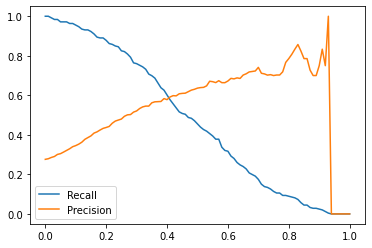

In [28]:
plt.plot(df_scores.threshold, df_scores['recall'], label='Recall')
plt.plot(df_scores.threshold, df_scores['precision'], label='Precision')
plt.legend()

# Question 4
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$
Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

In [29]:
df_scores['f1'] =  2 * ((df_scores.precision * df_scores.recall)/(df_scores.precision + df_scores.recall))
df_scores['f1'] = df_scores['f1']

In [30]:
df_scores['f1'] = df_scores['f1'].fillna(0)
df_scores

,threshold,tp,tn,fp,fn,recall,precision,f1
0,0.00,246,0,645,0,1.00000,0.276094,0.432718
1,0.01,246,10,635,0,1.00000,0.279228,0.436557
2,0.02,244,35,610,2,0.99187,0.285714,0.443636
3,0.03,242,54,591,4,0.98374,0.290516,0.448563
4,0.04,242,83,562,4,0.98374,0.300995,0.460952
...,...,...,...,...,...,...,...,...
96,0.96,0,645,0,246,0.00000,0.000000,0.000000
97,0.97,0,645,0,246,0.00000,0.000000,0.000000
98,0.98,0,645,0,246,0.00000,0.000000,0.000000
99,0.99,0,645,0,246,0.00000,0.000000,0.000000


In [31]:
df_scores[df_scores['f1'] == max(df_scores['f1'])]

,threshold,tp,tn,fp,fn,recall,precision,f1
32,0.32,183,490,155,63,0.743902,0.54142,0.626712


# Question 5
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)
* Iterate over different folds of df_full_train
* Split the data into train and validation
* Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
* Use AUC to evaluate the model on validation

In [32]:
from sklearn.model_selection import KFold

In [33]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    return dv, model

In [36]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')   
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred

In [37]:
n_splits = 5

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
scores = []
C = 1.0
for train_idx, val_idx in kfold.split(df_full_train[categorical + numerical]):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.default.values
    y_val = df_val.default.values
    
    del df_train['default']
    del df_val['default']
        
    dv, model = train(df_train, y_train, C=C)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=1.0 0.814 +- 0.015


# Question 6
Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: [0.01, 0.1, 1, 10]
* Initialize KFold with the same parameters as previously
* Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

In [38]:
n_splits = 5

for C in [0.01, 0.1, 1, 10]:
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.default.values
        y_val = df_val.default.values
        
        del df_train['default']
        del df_val['default']

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s => %.3f => %.3f' % (C, round(np.mean(scores),3), round(np.std(scores),3)))

C=0.01 => 0.808 => 0.012
C=0.1 => 0.813 => 0.014
C=1 => 0.814 => 0.015
C=10 => 0.812 => 0.014
